<a href="https://colab.research.google.com/github/sherrylittlefish/DLGAN/blob/main/pytorch_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import zipfile
import os

# 設定 zip 檔案路徑（根據你的實際位置修改）
zip_path = '/content/drive/MyDrive/高雄大學/pic.zip'
unzip_dir = '/content/unzipped'

# 解壓 pic.zip 到 /content/unzipped
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)
# 解壓 filter1.zip
filtered1_zip_path = os.path.join(unzip_dir, 'filtered1.zip')
filtered1_dir = os.path.join(unzip_dir, 'filtered1')
with zipfile.ZipFile(filtered1_zip_path, 'r') as zip_ref:
    zip_ref.extractall(filtered1_dir)
import shutil
import random

# 指定資料夾與輸出位置
folders = ['0051', '0052', '0053']
trainA_dir = '/content/dataset/trainA'
testA_dir = '/content/dataset/testA'

os.makedirs(trainA_dir, exist_ok=True)
os.makedirs(testA_dir, exist_ok=True)

# 收集所有圖片檔案路徑
all_images = []
for folder in folders:
    folder_path = os.path.join(filtered1_dir, folder)
    if os.path.isdir(folder_path):
        for fname in os.listdir(folder_path):
            fpath = os.path.join(folder_path, fname)
            if os.path.isfile(fpath):
                all_images.append(fpath)

# 打亂順序
random.shuffle(all_images)

# 分割資料集（約 1:10 比例）
split_index = max(1, int(len(all_images) * 0.1))  # 至少1張到testA
test_images = all_images[:split_index]
train_images = all_images[split_index:]

# 複製圖片
def copy_images(image_list, target_dir):
    for src_path in image_list:
        fname = os.path.basename(src_path)
        dst_path = os.path.join(target_dir, fname)
        # 若重名可加上 prefix 防止覆蓋（這裡為保簡單略過）
        shutil.copy(src_path, dst_path)

copy_images(train_images, trainA_dir)
copy_images(test_images, testA_dir)

print(f"✔ 總共 {len(all_images)} 張圖片，已分成：")
print(f"   ➤ trainA：{len(train_images)} 張")
print(f"   ➤ testA ：{len(test_images)} 張")
zip_path2 = '/content/drive/MyDrive/高雄大學/person_images_filtered.zip'
# 解壓 person_images_filtered.zip 到 /content/unzipped
with zipfile.ZipFile(zip_path2, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)
# 原始圖片資料夾
source_dir = '/content/unzipped/person_images_filtered'

# 輸出目錄
trainB_dir = '/content/dataset/trainB'
testB_dir = '/content/dataset/testB'

# 建立資料夾
os.makedirs(trainB_dir, exist_ok=True)
os.makedirs(testB_dir, exist_ok=True)


# 取得所有圖片清單
all_images = [f for f in os.listdir(source_dir) if os.path.isfile(os.path.join(source_dir, f))]

# 打亂順序
random.shuffle(all_images)

# # 設定比例（約10%進 testB，其餘進 trainB）
# num_test = max(1, int(len(all_images) * 0.1))  # 至少 1 張
# test_images = all_images[:num_test]
# train_images = all_images[num_test:]

# 指定要切出來的數量
num_train = 1200
num_test = 150

# 確保不超過總數
num_train = min(num_train, len(all_images))
num_test = min(num_test, len(all_images) - num_train)

# 切分
train_images = all_images[:num_train]
test_images = all_images[num_train:num_train + num_test]

# 複製檔案
def copy_images(image_list, target_dir):
    for fname in image_list:
        src = os.path.join(source_dir, fname)
        dst = os.path.join(target_dir, fname)
        shutil.copy(src, dst)

copy_images(train_images, trainB_dir)
copy_images(test_images, testB_dir)

print(f"✔ 已完成分割：")
print(f"   ➤ trainB：{len(train_images)} 張")
print(f"   ➤ testB ：{len(test_images)} 張")


Mounted at /content/drive
✔ 總共 1359 張圖片，已分成：
   ➤ trainA：1224 張
   ➤ testA ：135 張
✔ 已完成分割：
   ➤ trainB：1200 張
   ➤ testB ：150 張


In [3]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix
%cd pytorch-CycleGAN-and-pix2pix
!pip install -r requirements.txt


Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2516, done.
remote: Total 2516 (delta 0), reused 0 (delta 0), pack-reused 2516 (from 1)
Receiving objects: 100% (2516/2516), 8.20 MiB | 27.90 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.
/content/pytorch-CycleGAN-and-pix2pix
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 20.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 126.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 99.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 38.7 MB/s eta 0:00:00
   ━━━━━━

In [4]:
!python train.py --dataroot /content/dataset --name my_cyclegan_model --model cycle_gan


----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: /content/dataset              	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
              

In [5]:
!python test.py --dataroot /content/dataset --name my_cyclegan_model --model cycle_gan --direction BtoA


----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: /content/dataset              	[default: None]
             dataset_mode: unaligned                     
                direction: BtoA                          	[default: AtoB]
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0            

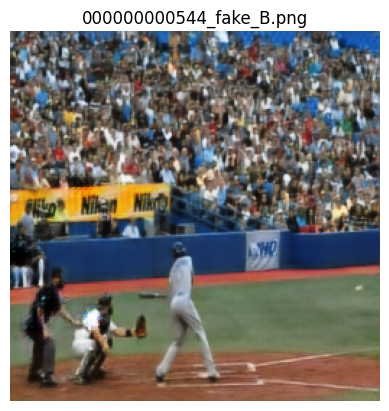

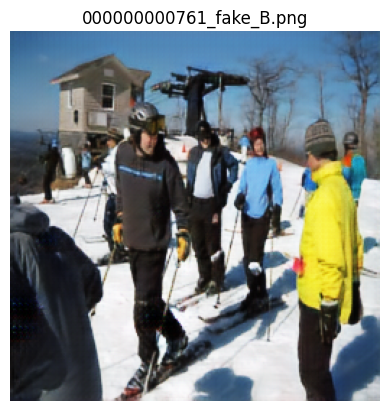

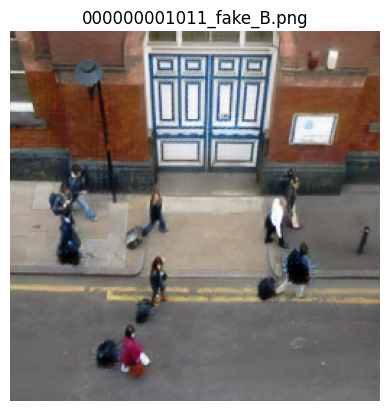

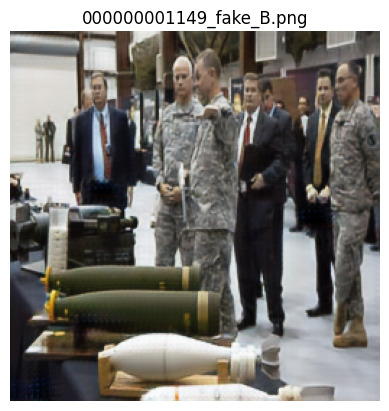

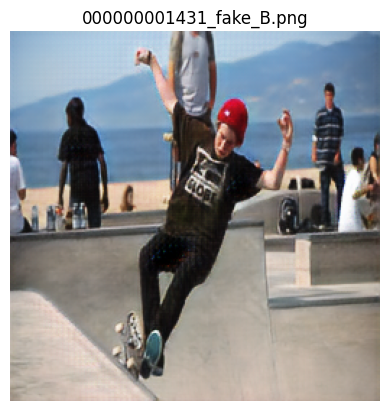

In [10]:
from PIL import Image
import matplotlib.pyplot as plt
import os

result_dir = './results/my_cyclegan_model/test_latest/images'
img_names = sorted([f for f in os.listdir(result_dir) if f.endswith('_fake_B.png')])

# 顯示前幾張結果
for img_name in img_names[:5]:
    img_path = os.path.join(result_dir, img_name)
    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(img_name)
    plt.show()
